In [1]:
import pandas as pd

In [2]:
# Veriyi Okuma
df=pd.read_csv("data.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [5]:
df["Ram"]=df["Ram"].str.replace('GB', '').astype(int)

In [6]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.0,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1


In [7]:
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True) # "bu değişikliği direkt tablonun üzerinde yap" (inplace=True)

In [8]:
df.head(2)

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.0,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1


In [9]:
print(df['ROM'].unique())

['512GB' '256GB' '128GB' '64GB' '1TB' '32GB' '2TB']


In [10]:
df['ROM']=df['ROM'].str.replace('1TB', '1024GB')
df['ROM']=df['ROM'].str.replace('2TB', '2048GB')
df['ROM']=df['ROM'].str.replace('GB', '').astype(int)

In [11]:
print(df['ROM'].unique())

[ 512  256  128   64 1024   32 2048]


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [26]:
categorical_features=['brand', 'name', 'processor', 'CPU', 'Ram_type', 'ROM_type', 'GPU', 'OS']
numerical_features=['spec_rating', 'Ram', 'ROM', 'display_size', 'resolution_width', 'resolution_height', 'warranty']

In [32]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [17]:
print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['spec_rating', 'Ram', 'Rom', 'display_size',
                                  'resolution_width', 'resolution_height',
                                  'warranty']),
                                ('cat', OneHotEncoder(),
                                 ['brand', 'name', 'processor', 'CPU',
                                  'Ram_type', 'Rom_type', 'GPU', 'OS'])])


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [33]:
model_pipeline=Pipeline([
    ('hazirlik_bandi', preprocessor),
    ('tahminci', KNeighborsRegressor())
])

In [34]:
from sklearn.model_selection import KFold, cross_val_score
X=df.drop('price', axis=1)
y=df['price']

In [35]:
kf=KFold(n_splits=10 ,shuffle=True, random_state=42)
sonuclar=cross_val_score(model_pipeline, X, y, cv=kf, scoring='r2')
print("10 Farklı Denemenin Sonuçları:")
print(sonuclar)
print("\nOrtalama Başarı Puanımız (R2):", sonuclar.mean())

10 Farklı Denemenin Sonuçları:
[0.78519106 0.87933403 0.87074391 0.7587746  0.43526199 0.89395598
 0.79145881 0.6482868  0.76403924 0.73138354]

Ortalama Başarı Puanımız (R2): 0.7558429955940005


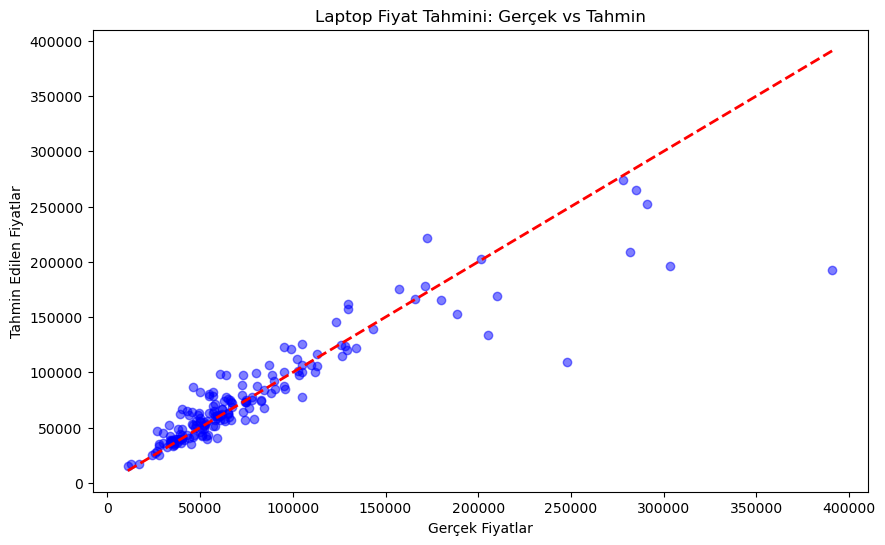

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Veriyi Eğitim ve Test olarak ikiye bölelim (Görselleştirme için)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Pipeline'ımızı eğitim verisiyle eğitelim
model_pipeline.fit(X_train, y_train)

# 3. Test verisi için tahminler yapalım
y_pred = model_pipeline.predict(X_test)

# 4. Görselleştirme (Gerçek vs Tahmin)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # İdeal çizgi
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.title('Laptop Fiyat Tahmini: Gerçek vs Tahmin')
plt.savefig('Laptop Fiyat Tahmini.png')
plt.show()